In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [2]:
#Load the data set
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Information of Dataset

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


>There are 45,211 rows and 17 columns in the dataset, There is no null value in the dataset.


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i, '\n', df[i].value_counts(),'\n', '\n')

age 
 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 
 

job 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 
 

marital 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
 

education 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 
 

default 
 no     44396
yes      815
Name: default, dtype: int64 
 

balance 
  0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64 
 

housing 
 yes    25130
no   

**Attribute information For bank dataset**

   Input variables:
   -> bank client data:
   1.  age (numeric)
   2.  job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",                 "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no")  
   9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
 

  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)
  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17. y - has the client subscribed a term deposit? (binary: "yes","no")


In [7]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 3

# Data Cleaning 

> Data Cleaning for dataset and each column of dataset

> Data Cleaning Variable-wise

## Droping Unnecessary Column

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df=df.drop(['day'],axis=1)

## Default

In [10]:
#defaut features does not play imp role
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [11]:
df.drop(['default'],axis=1, inplace=True)

## Month

In [12]:
df.replace({'month' : { "jan" : 1,"feb" : 2 , "mar":3, "apr" :4  ,  "may" :5 ,"jun" : 6, 
                       "jul" : 7, "aug" : 8, "sep" : 9,"oct" : 10, "nov" : 11 ,"dec" : 12}})

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,cellular,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,11,508,4,-1,0,unknown,no


##P-Days

In [13]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [14]:
# drop pdays as it has -1 value for around 40%+ 
df.drop(['pdays'],axis=1, inplace=True)

## Age

In [15]:
df.groupby('age',sort=True)['age'].count()


age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [16]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_cat"] = "20 to 30"
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_cat"] = "30 to 40"
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_cat"] = "40 to 50 "
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_cat"] = "50 to 60"
    column.loc[column["age"] >= 60, "age_cat"] = "60"
df['age_cat'] = df['age_cat']
#.astype(np.int64)

In [17]:
# Using DataFrame.insert() to add a column
df.insert(0, 'Age_cat',value=df['age_cat'])

In [18]:
df=df.drop(['age','age_cat'], axis=1)

## Balance

In [19]:
# remove outliers in feature balance...
df.groupby(['y','balance'],sort=True)['balance'].count()


y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

* As Balance is high , Client shows interest in deposite

## Duration

In [20]:
# Convert duration to minutes of conversation.
decimal_points = 2
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].apply(lambda x: round(x, decimal_points))

In [21]:
df.groupby(['y','duration'],sort=True)['duration'].count()


y    duration
no   0.00         3
     0.02         2
     0.03         3
     0.05         4
     0.07        15
                 ..
yes  51.57        1
     51.70        1
     53.05        1
     54.22        1
     64.68        1
Name: duration, Length: 2627, dtype: int64

<AxesSubplot:ylabel='duration'>

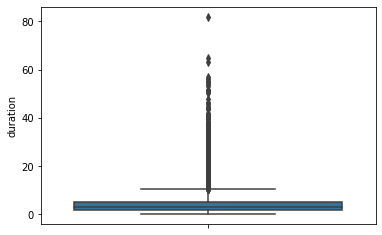

In [22]:
sns.boxplot(y="duration", data=df)

In [23]:
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)

In [24]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.duration>lower_limit)&(df.duration<upper_limit)]


<AxesSubplot:ylabel='duration'>

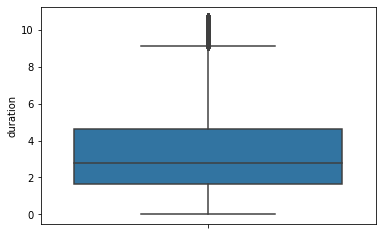

In [25]:
sns.boxplot(y="duration", data=df)

* As duration goes high, client show interest on deposit

## Campaign

In [26]:
pd.set_option('display.max_rows', 500)

In [27]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14427
     2           10612
     3            4670
     4            3081
     5            1565
     6            1160
     7             664
     8             489
     9             295
     10            246
     11            181
     12            144
     13            121
     14             87
     15             78
     16             76
     17             61
     18             51
     19             43
     20             41
     21             33
     22             23
     23             22
     24             18
     25             21
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

In [28]:
df=df[df['campaign'] < 33]

In [29]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14427
     2           10612
     3            4670
     4            3081
     5            1565
     6            1160
     7             664
     8             489
     9             295
     10            246
     11            181
     12            144
     13            121
     14             87
     15             78
     16             76
     17             61
     18             51
     19             43
     20             41
     21             33
     22             23
     23             22
     24             18
     25             21
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            1940
     2             932
     3             391
     4             166
     5              79
     6              52
     7              24
     8              19
     9              10
     10              4
     11             

## Previous

In [30]:
df.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32156
     1            2112
     2            1605
     3             811
     4             521
     5             327
     6             188
     7             146
     8              86
     9              65
     10             38
     11             49
     12             33
     13             29
     14             14
     15             18
     16             13
     17             12
     18              5
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
     275             1
yes  0            2044
     1             483
     2             383
     3             2

In [31]:
df.previous.mean()

0.5867102344551244

In [32]:
df=df[df['previous'] < 58]

In [33]:
df.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32156
     1            2112
     2            1605
     3             811
     4             521
     5             327
     6             188
     7             146
     8              86
     9              65
     10             38
     11             49
     12             33
     13             29
     14             14
     15             18
     16             13
     17             12
     18              5
     19              9
     20              7
     21              3
     22              5
     23              7
     24              5
     25              4
     26              1
     27              5
     28              2
     29              3
     30              2
     32              1
     35              1
     37              2
     38              2
     40              1
     41              1
     51              1
yes  0            2044
     1             483
     2             383
     3             245
     4             1

# Data-information after Cleaning

In [34]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age_cat: ['50 to 60' '40 to 50 ' '30 to 40' '20 to 30' '60']
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 4.35  2.52  1.27  1.53  3.3   2.32  3.62  6.33  0.83  0.92  3.7   2.28
  8.62  1.18  2.9   5.88  1.63  0.63  3.65  0.9   4.37  2.73  2.67  5.7
  3.02  2.87  4.93  2.12  4.25  5.8   3.75  3.83  3.47  3.77  5.6   4.03
  6.08  9.62  3.    0.37 10.27  5.92  6.05  4.43  4.22  2.98  2.42  1.73
  0.22  3.08  2.3   6.52  5.95  1.52  8.8   4.55  2.63  2.95  4.3   2.57
  4.85  2.93  3.52  5.82  4.53  3.22  3.53  0.33  4.1   8.82  3.13  0.8
  3.55  9.72  3.68  2.88

In [35]:
df.shape

(41925, 14)

In [36]:
df[df.duplicated()].shape


(4, 14)

In [37]:
#df = df.drop_duplicates()


In [38]:
df.shape

(41925, 14)

In [39]:
df.isnull().sum()

Age_cat      0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

# Logistic Regression

> There is a variable named Y is our target variables and others are our independent variables 

> Here, the target variable is binary variable means it has only two outputs.
so we,will use Logistic regression for predicting Y Variable 

In [40]:
#create dict for binary encoding
dic = {"yes":1,"no":0}

label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ['y',"loan","housing"]
for i in lst:
    df[i] = df[i].map(dic)

In [41]:
# Ordinal Encoding
l=["contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)

In [42]:
df.head(2)

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,1,0,2,may,4.35,1,0,3,0
1,40 to 50,technician,single,secondary,29,1,0,2,may,2.52,1,0,3,0


In [43]:
# Dividing our data into input and output variables 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [44]:
X = pd.get_dummies(data = X)

In [45]:
df.head(1)

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,1,0,2,may,4.35,1,0,3,0


In [46]:
X.shape,Y.shape

((41925, 44), (41925,))

# Hold-out

In [47]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [48]:
#Logistic regression and fit the model
model = LogisticRegression(max_iter=500)
model.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

C:\Users\tjadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [49]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [50]:
#Predict for X dataset
pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = model.predict(x_test)
y_pred.shape

(8385,)

In [51]:
prediction=[round(value) for value in y_pred]
#prediction

In [52]:
# evaluate predictions
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.85%


In [53]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})

In [54]:
Classification_report = classification_report(y_test,y_pred)
clsreport = print(Classification_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7672
           1       0.56      0.19      0.29       713

    accuracy                           0.92      8385
   macro avg       0.75      0.59      0.62      8385
weighted avg       0.90      0.92      0.90      8385



In [55]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

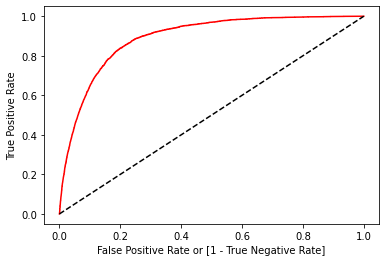

In [56]:

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [57]:
auc

0.5897356116922869

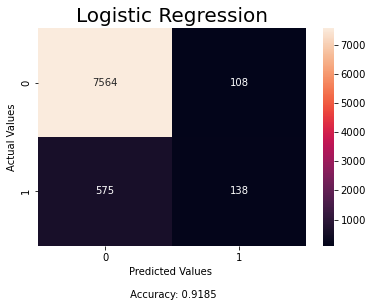

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy=accuracy_score(y_test, y_pred)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
plt.show()

# K-folds-cross-validation



In [59]:
scores = cross_val_score(model,X,Y, cv=7)
scores

C:\Users\tjadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tjadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.91452421, 0.89432387, 0.86608783, 0.89731174, 0.8779429 ,
       0.80213725, 0.7969611 ])

In [60]:
scores.mean()*100

86.4184126897404